### HW1 Arina Shelashen
1.Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.<br>
2.Проведите анализ — что приводит к ухудшению точности нейронной сети?<br>
3.Что приводит к увеличению ее точности?<br><br>
**Ответ:**
1. Learning Rate нужно подбирать оптимальный, слишком большой и слишком малый плохо влияют на скор. Лучше всего получается при скорости обучения ~0.01
2. Увеличение кол-ва эпох и кол-ва нейронов повышает скор, но в какой-то момент зависимость выходит примерно на плато, так что намного больше не всегда значит намного лучше. 40 нейронов уже достаточно. 100 эпох хватает с головой
*Solution:*
1. The dependence of *accuracy* on learning rate, number of iterations, number of neurons was investigated. Dependecy graphs were built.
2. Too low and too high learning rate lead to bad accuracy score. Optimum - 0.01 .
3. Incresing of number of iterations and number of neurons lead to the growth of the accuracy score. Good parameters: 100 iterations, 100 neurons.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [3]:
X, y = load_digits(return_X_y=True)
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [5]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 30

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.01

# количество итераций
num_epochs = 1000

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

In [6]:
# процесс обучения
def network(num_epochs, learning_rate, neuron_numb):
    metrics=[]
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))
    for i in range(num_epochs):
        
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение (back propagation)
        # с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_grad.dot(w1.T)
        layer1_grad = layer1_error * sigmoid_deriv(layer1)

        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate

        # ошибка модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)

        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)
    return metrics

# neuron[neuron_numb] = round(metrics[-1], 3)

In [7]:
epochs=network(5000,0.008,40)

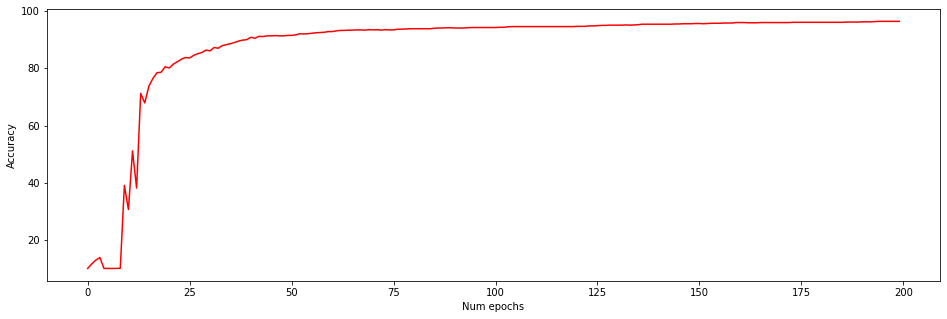

In [8]:
plt.figure(figsize=(16, 5))
plt.plot(range(200), epochs[:200],'r')

plt.xlabel('Num epochs')
plt.ylabel('Accuracy')
plt.show()

In [9]:
learning_rate_log = np.linspace(-5,2,20)
learning_rate = 10**learning_rate_log
learning_rate

array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02])

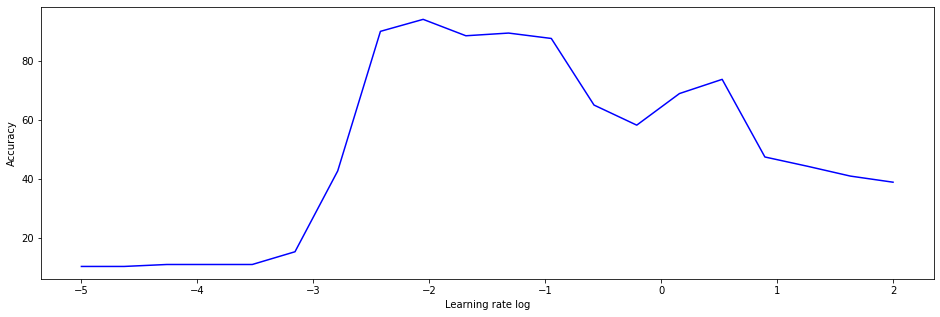

In [10]:
lr_result = []
for i in learning_rate:
    final_accuracy = network(100, i, 30)[-1]
    lr_result.append(final_accuracy)
    
plt.figure(figsize=(16, 5))
plt.plot(learning_rate_log, lr_result,'b')

plt.xlabel('Learning rate log')
plt.ylabel('Accuracy')
plt.show()

In [11]:
learning_rate_log = np.linspace(-3,-1,10)
learning_rate = 10**learning_rate_log
learning_rate

array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ])

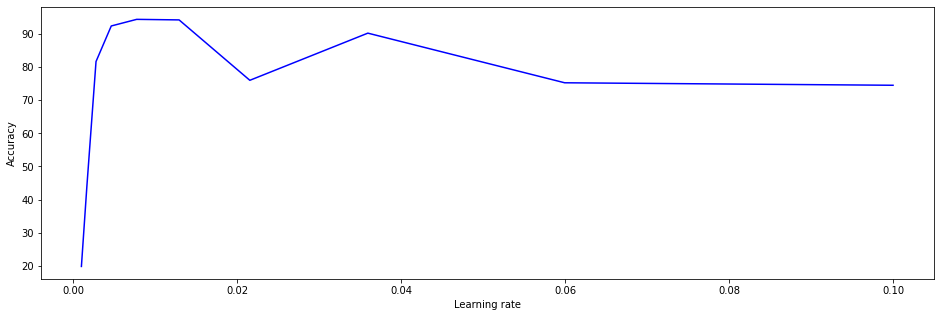

In [12]:
lr_result = []
for i in learning_rate:
    final_accuracy = network(100, i, 30)[-1]
    lr_result.append(final_accuracy)
    
plt.figure(figsize=(16, 5))
plt.plot(learning_rate, lr_result,'b')

plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.show()

In [13]:
learning_rate = np.linspace(0.005,0.02,10)
learning_rate

array([0.005     , 0.00666667, 0.00833333, 0.01      , 0.01166667,
       0.01333333, 0.015     , 0.01666667, 0.01833333, 0.02      ])

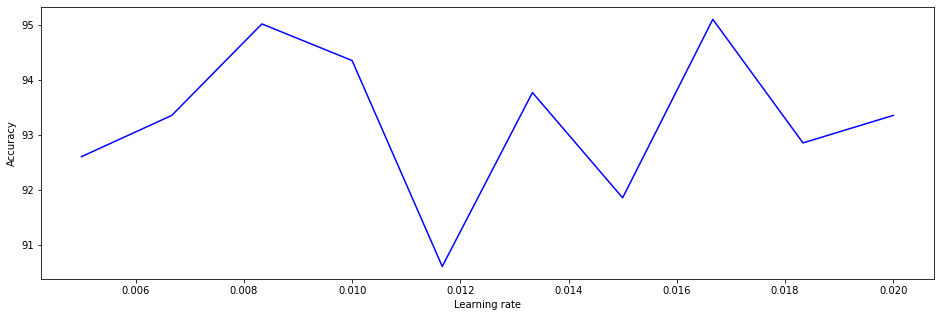

In [14]:
lr_result = []
for i in learning_rate:
    final_accuracy = network(100, i, 30)[-1]
    lr_result.append(final_accuracy)
    
plt.figure(figsize=(16, 5))
plt.plot(learning_rate, lr_result,'b')

plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.show()

In [15]:
num_neurons = np.linspace(1,100,10, dtype=int)
num_neurons

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

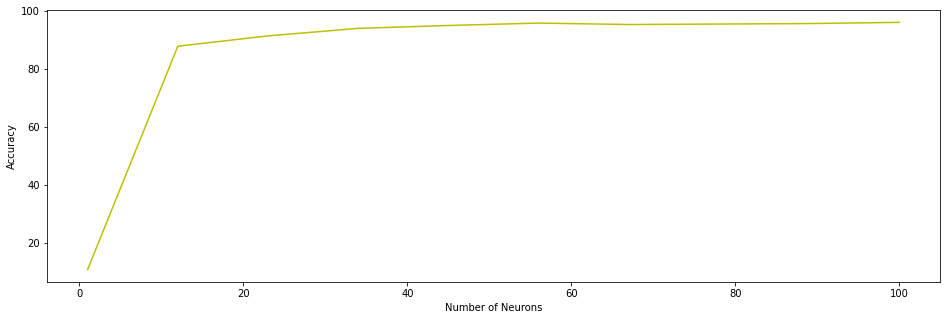

In [16]:
nn_result = []
for i in num_neurons:
    final_accuracy = network(100, 0.008, i)[-1]
    nn_result.append(final_accuracy)
    
plt.figure(figsize=(16, 5))
plt.plot(num_neurons, nn_result,'y')

plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.show()